# Machine Learning Engineer Nanodegree Capstone Project

## Data Set Information:
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 

## Applicance Energy Prediction

In [1]:
! pip install tensorflow as tf 
! pip install pandas as pd
! pip install matplotlib
! pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.9 MB 12.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0


In [2]:
# Import necessary libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Common seed value to be used whenever required
seed = 79
np.random.seed(seed)


 ## Read the Data

In [68]:
energy = pd.read_csv("energydata_complete.csv")

In [67]:
energy.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [5]:
energy.dtypes

Appliances       int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object

## Exploratory Analysis

In [6]:
energy.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [7]:
# Dataset characteristics
print("Number of instances in dataset = {}".format(energy.shape[0]))
print("Total number of columns = {}".format(energy.columns.shape[0]))
print("Column wise count of null values:-")
print(energy.isnull().sum())

Number of instances in dataset = 19735
Total number of columns = 25
Column wise count of null values:-
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64


No missing values in the columns

## Column

In [8]:
# Columns for temperature sensors
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humidity sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather data
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target variable column
target = ["Appliances"]

In [9]:
energy[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


In [10]:
energy[rho_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


In [11]:
energy[weather_cols].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834
std,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719
min,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000
25%,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000
50%,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000
75%,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000
max,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000


In [12]:
energy[target].describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


## What we see from the columns

1.) Temperature ranges for all home sensors between 14.89°C to 29.86°C except for T6 for which it is -6.06℃ to 28.29℃.

2.) Humidity  ranges for all sensors is between 20.60% to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82% to 96.32% and 1% to 99.9% respectively.The reason behind this is that RH_5 is inside the bathroom and RH_6 is outside the building, explaining the high humidity values.

# Exploratory Visualization

## Correlation plots

### Temperature sensors

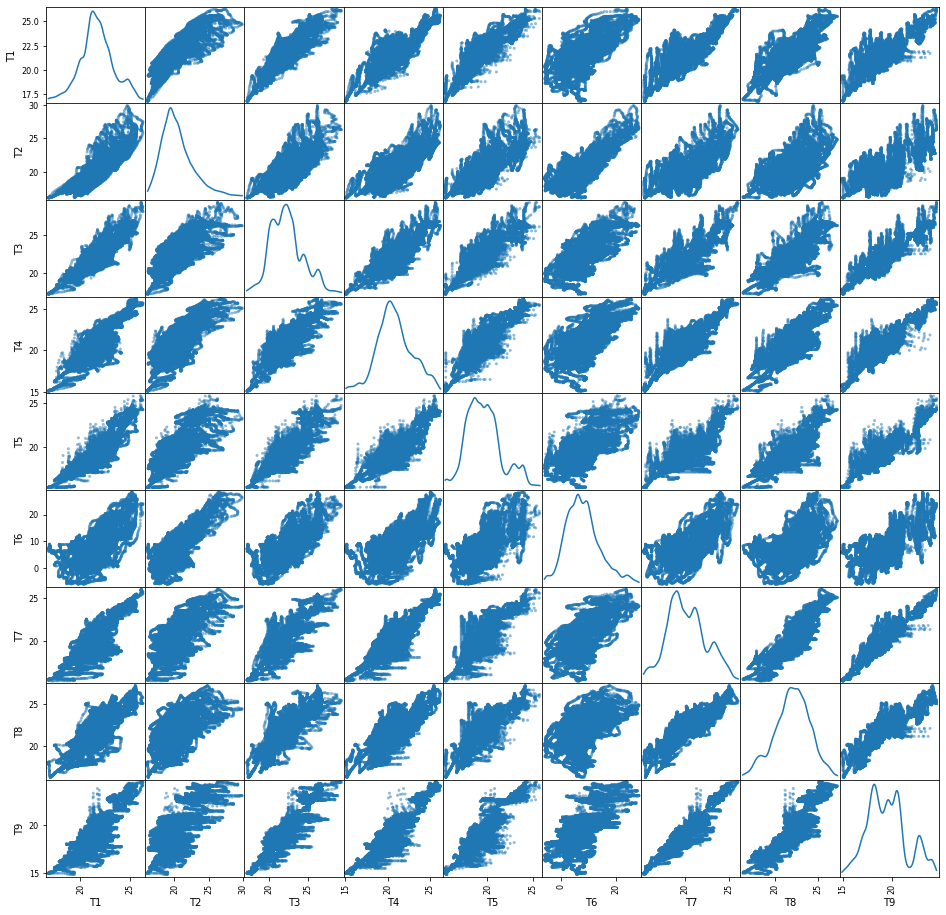

In [13]:
temp_scatter = pd.plotting.scatter_matrix(energy[temp_cols], diagonal="kde", figsize=(16, 16))

If we take a look at colums T7 and T9 we see a siginificant correlation there. Let's have a look.

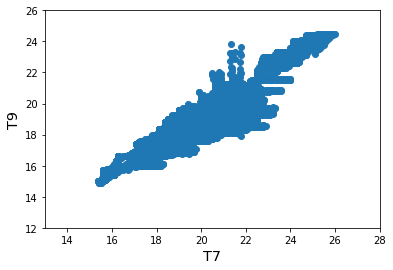

In [14]:
plt.xlabel("T7", fontsize='x-large')
plt.ylabel("T9", fontsize='x-large')

plt.xlim(int(energy.T7.min()) - 2, int(energy.T7.max()) + 2)
plt.ylim(int(energy.T9.min()) - 2, int(energy.T9.max()) + 2)

plt.scatter(energy["T7"], energy["T9"])

### Humidity sensors

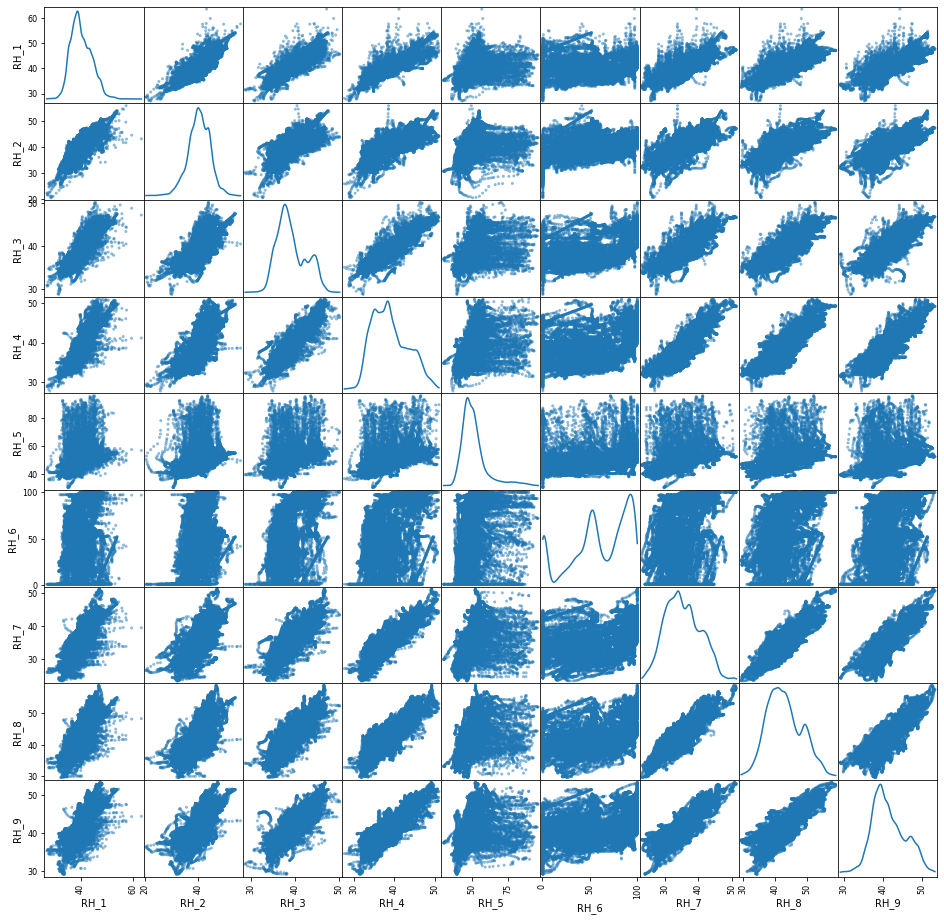

In [15]:
rho_scatter = pd.plotting.scatter_matrix(energy[rho_cols], diagonal="kde", figsize=(16, 16))

For humidity sensors, we can't see a significant correlation.

### Weather data

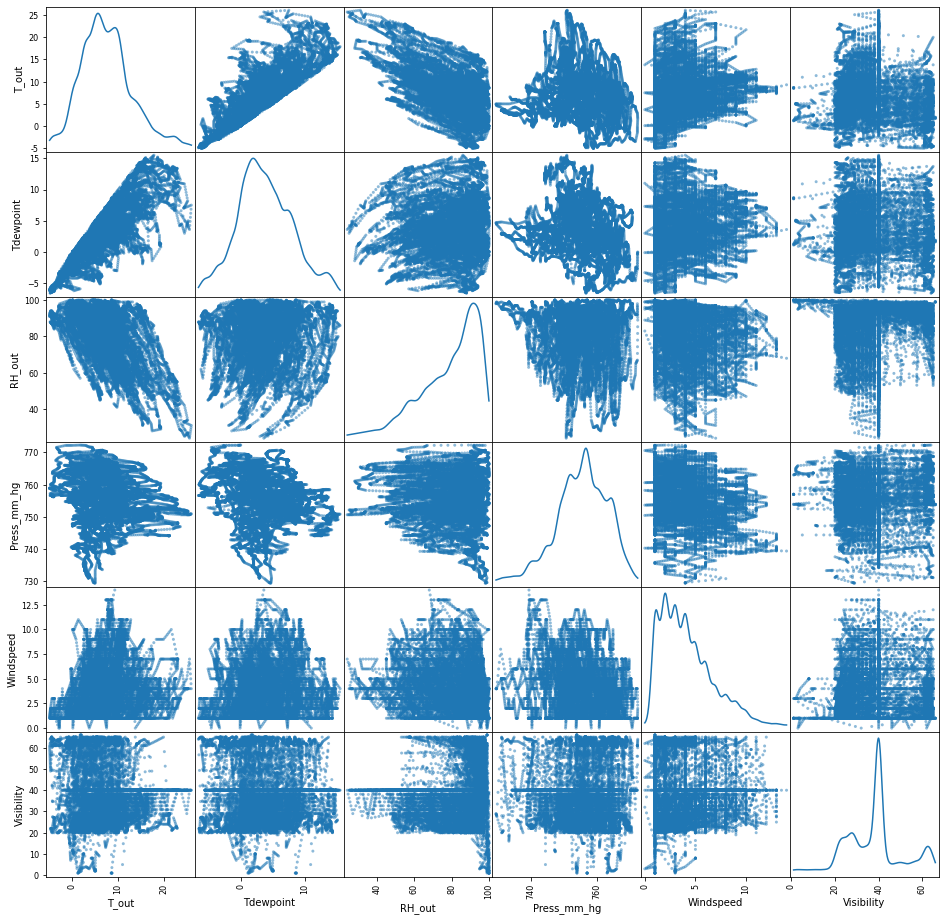

In [16]:
weather_scatter = pd.plotting.scatter_matrix(energy[weather_cols], diagonal="kde", figsize=(16, 16))

If we now look at the table, we can see that the features are uncorrelated.

### Histogram for each column

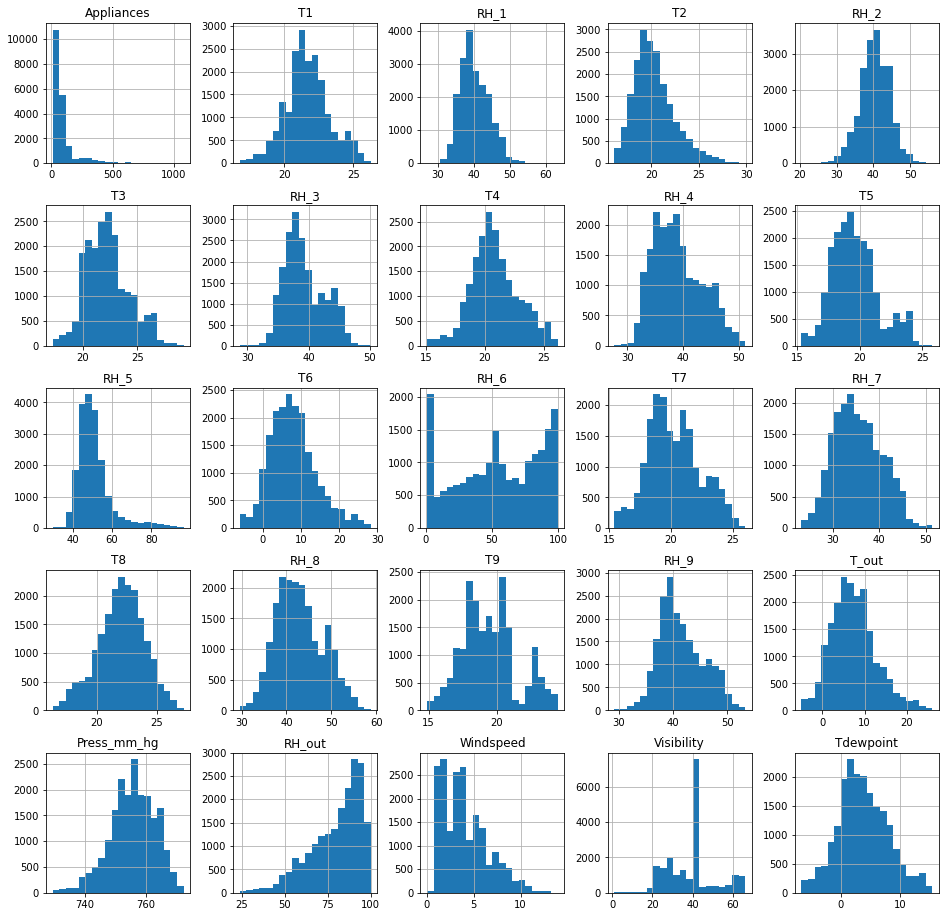

In [17]:
histograms = energy.hist(figsize=(16, 16), bins=20)

 From the histograms, we can see 

* All humidity values follow a normal distribution, except RH_6 & RH_out, so all measured values inside the houses are normally distributed.
* All temperature values follow also a normal distribution, except of T9
* Furthermore, we can see that **Appliances** , lights, Windspee and Visability are skewed.
* And we can't see a similarity between our target variable **Appliances** and the remaining colums. Lights & Windspeed look similar, but the number of observations are different as seen from the y-axes of both plots.

Let's confirm this by plotting Appliances against Windspeed. Also, let's plot Appliances histogram separately to get better idea about it's distribution.

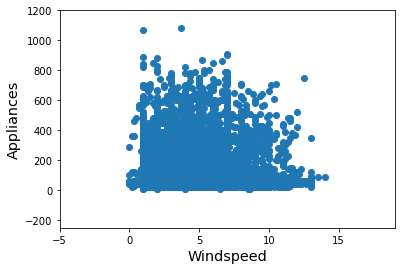

In [18]:
plt.xlabel("Windspeed", fontsize='x-large')
plt.ylabel("Appliances", fontsize='x-large')

plt.xlim(-5, energy.Windspeed.max() + 5)
plt.ylim(-250, 1200)

plt.scatter(energy["Windspeed"], energy["Appliances"])

So we can confirm, that there is no linear relationship between Windspeed & **Appliances**

<AxesSubplot:xlabel='Appliance Energy Consumption in Wh', ylabel='No. of instances'>

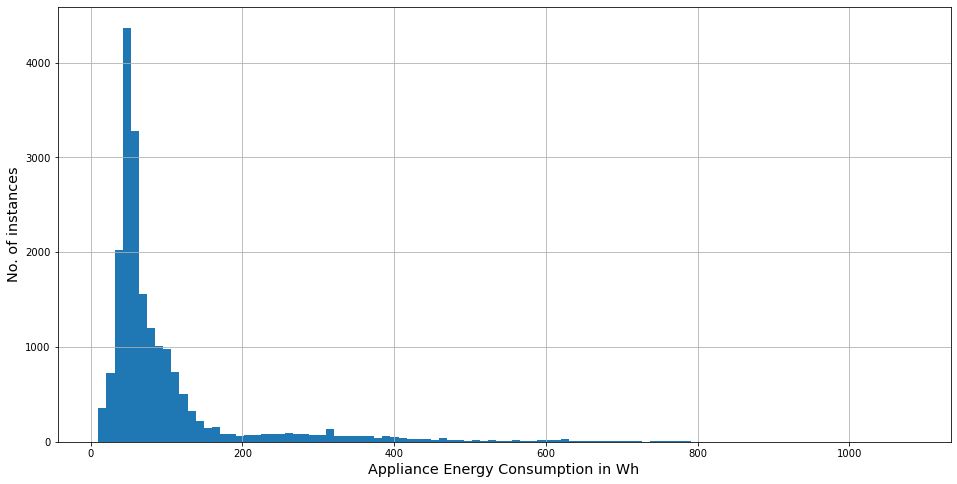

In [19]:
# Appliances histogram

plt.xlabel("Appliance Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")

energy["Appliances"].hist(figsize=(16, 8), bins=100)

If we take a look at the range of the values, we easily can see, that the most values are between 0-200 Wh. It strengthening our assumption that there are few cases of high energy consumption. The percentage of values within this range is calculated below.

In [20]:
print("Percentage of dataset in range of 0-200 Wh")
print("{:.3f}%".format(
    (energy[energy.Appliances <= 200]["Appliances"].count()*100.0) / energy.shape[0]
))



Percentage of dataset in range of 0-200 Wh
90.291%


Now let's check the correlation between T7 and T9.

In [21]:
# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(energy["T7"], energy["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9447764235687443
p-value : 0.0


Let's manually calculate which column pairs have a high degree of correlation (> 0.9)

In [22]:
# To generate all pairs for given columns
from itertools import combinations

for pair in combinations(energy.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(energy[col_1], energy[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.901323585082566
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9110551178067932
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747866900664537
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9447764235687443
p-value : 0.0


We can see that there is a very high degree of positive correlation between this two columns. Also, p-value is less than 0.01. Thereofore, we can reject the null hypothesis that this two columns don't affect each other

Also, a very high correlation exists between features T6 and T_out. This shouldn't be surprising as T6 is reading from a temperature sensor kept outside the building and T_out is temperature obtained from Weather station.

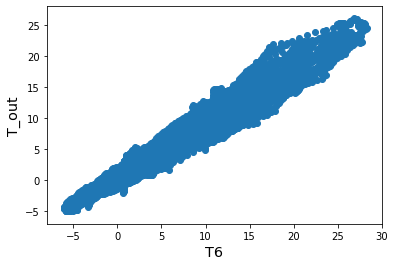

In [23]:
plt.xlabel("T6", fontsize='x-large')
plt.ylabel("T_out", fontsize='x-large')

plt.xlim(int(energy.T6.min()) - 2, int(energy.T6.max()) + 2)
plt.ylim(int(energy.T_out.min()) - 2, int(energy.T_out.max()) + 2)

plt.scatter(energy["T6"], energy["T_out"])

As we can see the two characteristics are highly correlated.

## Benchmark Model


For benchmark, I will use Linear regression, using all the features as input data and without scaling the dataset. This will give an idea about the improvements gained from:

* Performing feature scaling.
* Performing feature selection.
* Performing cross validation.
* Using more complex Regression algorithms.
* Hyper-parameter tuning of the regressor.


In [24]:
from sklearn.linear_model import LinearRegression
from time import time

# Prepare the data
X_train = energy.drop("Appliances", axis=1)
y_train = energy["Appliances"]

# Initialize and fit the model
benchmark_model = LinearRegression()
start = time()
benchmark_model.fit(X_train, y_train)
end = time()

print("Classifier fitted in {:.3f} seconds".format(end-start))

# Load the test dataset
test = pd.read_csv("energydata_complete.csv")

# Separate the features and the target variable
X_test = test.drop("Appliances", axis=1)
y_test = test["Appliances"]

# Print scores on both
print("Score on training data : {:.3f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on testing data : {:.3f}%".format(benchmark_model.score(X_test, y_test) * 100))

Classifier fitted in 0.017 seconds
Score on training data : 14.641%
Score on testing data : 14.641%


## Data Preprocessing

In [25]:
# Remove correlated features T6 and T9
train = energy.drop(["T6", "T9"], axis=1)
test.drop(["T6", "T9"], axis=1, inplace=True)

In [26]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Scales the data to zero mean and unit variance
standard_scaler = StandardScaler()

In [27]:
# Create dummy dataframes to hold the scaled train and test data
train_scaled = pd.DataFrame(columns=train.columns, index=train.index)
test_scaled = pd.DataFrame(columns=test.columns, index=test.index)

In [28]:
# Store the scaled data in new dataframes
train_scaled[train_scaled.columns] = standard_scaler.fit_transform(train)
test_scaled[test_scaled.columns] = standard_scaler.fit_transform(test)

In [29]:
# Prepare training and testing data
X_train = train_scaled.drop("Appliances", axis=1)
y_train = train_scaled["Appliances"]

X_test = test_scaled.drop("Appliances", axis=1)
y_test = test_scaled["Appliances"]

## Algorithms to be used

Regularized Linear models as an improvement over Linear Regression.

* Ridge Regression
* Lasso Regression

Ensemble based Tree Regression models to deal robustly with outlier data and large number of features.

* Random Forests
* Gradient Boosting
* Extra Trees

Neural networks for exploring non linear relationships between features and target.

* Multi-Layer Preceptron

## Model Implementation

In [30]:
# To calculate Root mean squared error
from sklearn.metrics import mean_squared_error

# Function to fit the regressor and record its metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    # Dictionary to hold the properties
    reg_props = {}
    
    # Initialize and fit the regressor while recording the time taken for fitting
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    
    return reg_props

In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        Lasso,
        RandomForestRegressor,
        GradientBoostingRegressor,
        ExtraTreesRegressor,
        MLPRegressor
    ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test, random_state=seed)
        props.append(properites)
        
    return props

In [32]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training times": train_times,
                            "Training scores": train_scores,
                            "Testing scores": test_scores,
                            "RMSE": rmse_vals
                      }
                  )
    
    return df

In [33]:
# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

## Visualize performance

In [34]:
# Calculate RMSE for the Benchmark model

test_data = pd.read_csv("energydata_complete.csv")

# For calculating RMSE of Linear Regression (Benchmark Model),  
# we will scale the dataset so that all RMSE values are in the same scale
# We can inverse scale the data for other Regressor, but that will be more cumbersome to do

data = standard_scaler.fit_transform(energy)
test_data = standard_scaler.fit_transform(test_data)

X = data[:, :-1]
y = data[:, -1]
X_t = test_data[:, :-1]
y_t = test_data[:, -1]

# Fit the model
start = time()
benchmark_model.fit(X, y)
end = time()

# Append the peoperties of Benchmark model to the DataFrame
# storing the properties of selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "RMSE": np.sqrt(mean_squared_error(y_t, benchmark_model.predict(X_t))),
        "Training scores": benchmark_model.score(X, y),
        "Testing scores" :benchmark_model.score(X_t, y_t),
        "Training times": end - start,
        "Name": "Linear Regression (Benchmark)"
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

,Training times,Training scores,Testing scores,RMSE
Ridge,0.00851369,0.134471,0.134471,0.930338
Lasso,0.0076282,0,0,1
RandomForestRegressor,46.5358,0.948061,0.948061,0.227901
GradientBoostingRegressor,10.9027,0.316277,0.316277,0.826875
ExtraTreesRegressor,11.7277,1,1,1.34798e-15
MLPRegressor,18.2818,0.491374,0.491374,0.71318
Linear Regression (Benchmark),0.00581694,0.988396,0.988396,0.107721


<AxesSubplot:title={'center':'Training time of Regressors'}, ylabel='Training time in seconds'>

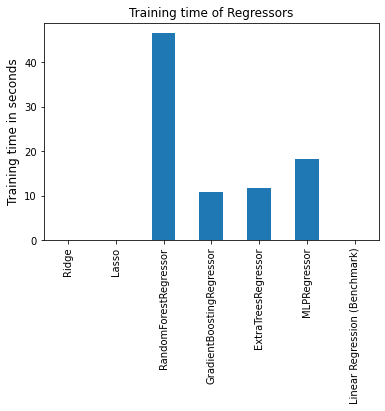

In [35]:
# Plot to compare the training time of algorithms
plt.ylabel("Training time in seconds", fontsize="large")
properties["Training times"].plot(kind="bar", title="Training time of Regressors")

* Fastest Regressor to train - Linear, Ridge and Lasso Regressors
* Slowest Regressor to train - Multi Layer Perceptron

Text(0, 0.5, 'R2 Score/ RMSE')

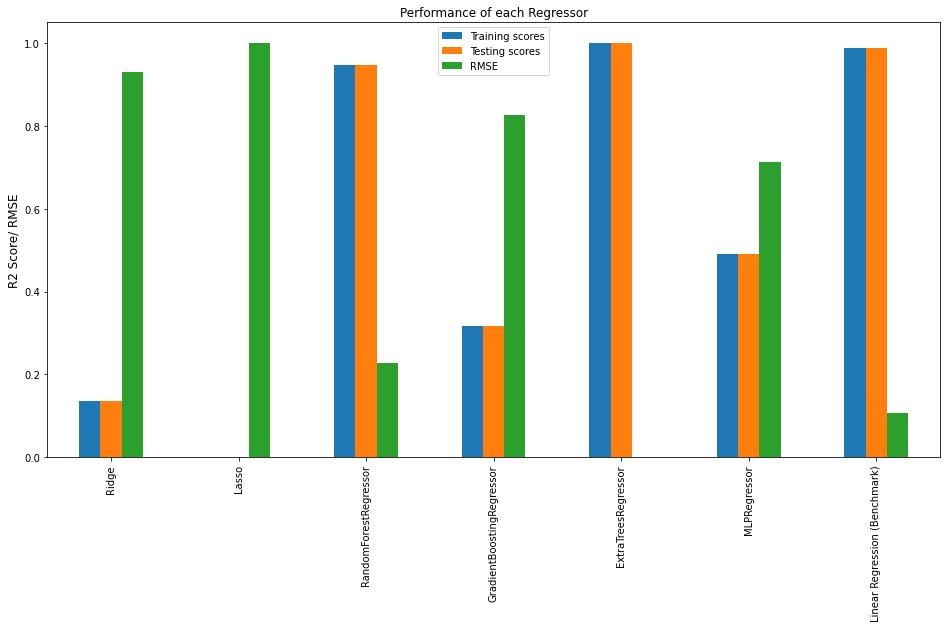

In [36]:
# Plot to compare the performance of the algorithms on both datasets
ax= properties[["Training scores", "Testing scores", "RMSE"]].plot(kind="bar", title="Performance of each Regressor", figsize=(16, 8))
ax.set_ylabel("R2 Score/ RMSE", fontsize="large")

* Least performing Regressor - Lasso Regressor
* Best performing Regressor - Extra Trees Regressor

Even though Extra Trees Regressor has a R2 score of 1.0 on traininig set, which might suggest overfitting but, it has the highest score on test set and also, it's RMSE value is also the lowest. Clearly, ExtraTreesRegressor is the best model out of given models.

## Hyperparameter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor(random_state=seed)

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 100, 200, 250],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100, 200, 500]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=20, scoring="r2", cv=5, n_jobs=-1, verbose=2, random_state=seed)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=79),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100, 200,
                                                      500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 200,
                                                         250]},
                   random_state=79, scoring='r2', verbose=2)

## Review

In [38]:
# Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}


In [39]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))))
print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))

R2 score on Training set = 0.344
RMSE on Training set = 0.810
R2 score on Testing set = 0.344
RMSE on Testing set = 0.810


## Feature Analysis

In [40]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(X_train.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(X_train.columns[index])

Most important feature = RH_out
Least important feature = Visibility

Top 5 most important features:-
RH_out
T3
RH_1
RH_8
T2

Top 5 least important features:-
Visibility
Tdewpoint
RH_5
T_out
RH_4


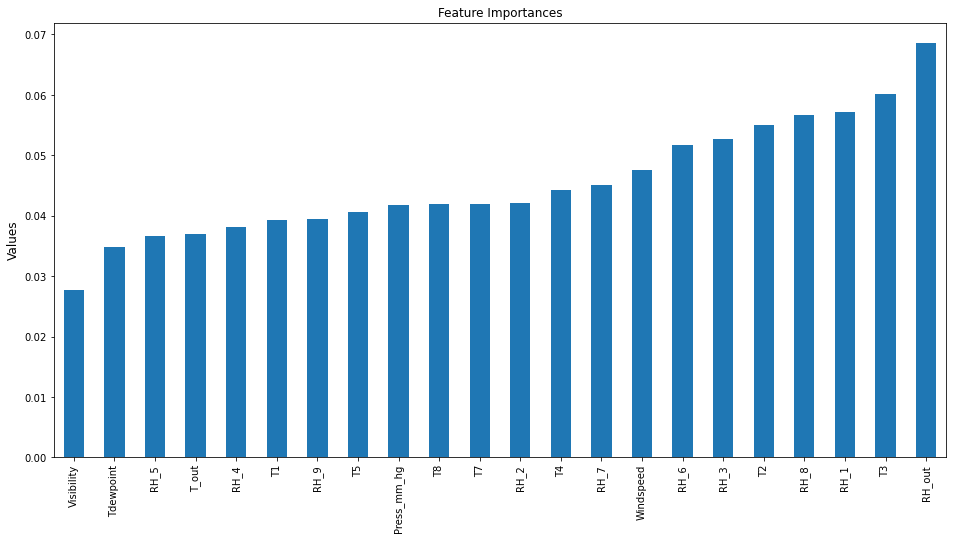

In [41]:
# Plot feature importance

fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

In [42]:
# Constructing data set from reduced feature space
X_train_reduced = X_train[X_train.columns[feature_indices[::-1][:5]]]
X_test_reduced = X_test[X_test.columns[feature_indices[::-1][:5]]]

In [43]:
from sklearn.base import clone

# Clone the best model
reg_best = clone(best_model)
# Fit the model on reduced data set 
reg_best.fit(X_train_reduced, y_train)
print("R2 Score on testing dataset = {:.3f}".format(reg_best.score(X_test_reduced, y_test)))
print("RMSE Score on testing dataset = {:.3f}".format(np.sqrt(mean_squared_error(y_test, reg_best.predict(X_test_reduced)))))

R2 Score on testing dataset = 0.235
RMSE Score on testing dataset = 0.875
